In [ ]:
%%capture
!pip install ace-tools-open
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install pytorch-tabnet
!pip install shap
!pip install optuna
!pip install xgboost
!pip install tabnet
!pip install pygad
!pip install deap
!pip install imbalanced-learn
!pip install sklearn-genetic-opt
!pip install ace_tools_open
!pip install xgboost

# PIMA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import MeanShift
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)
print(df)
print(df.describe())
print("Shape of the dataset", df.shape)
print("Amount of missing data (%) = ", (df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

/tmp/ipython-input-3-4240623542.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data.values, labels=cols, showfliers=False,


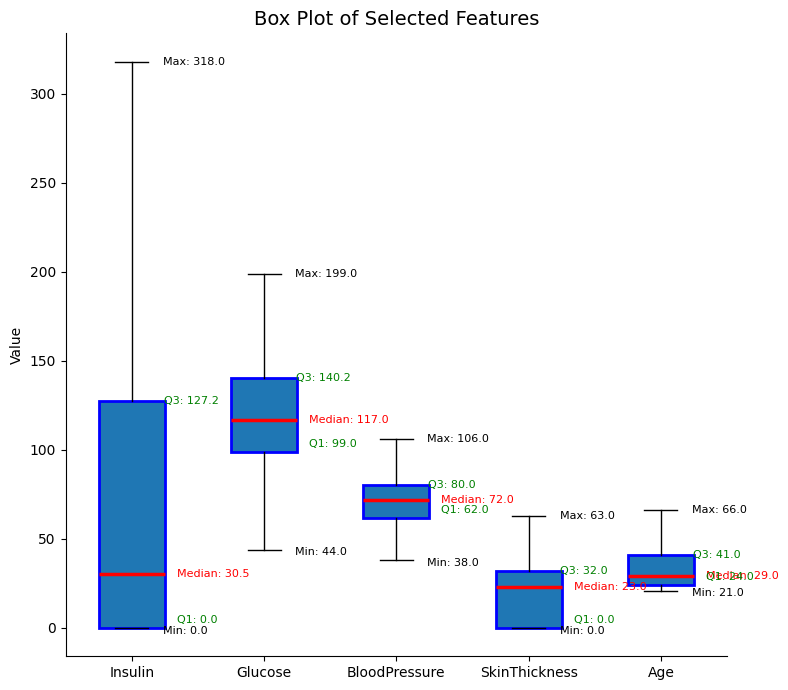

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cols = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']
data = df[cols]
fig, ax = plt.subplots(figsize=(8, 7))
boxprops = dict(linewidth=2, color='blue')
medianprops = dict(linewidth=2.5, color='red')
bp = ax.boxplot(data.values, labels=cols, showfliers=False,
                boxprops=boxprops, medianprops=medianprops, patch_artist=True)

for i, col in enumerate(cols):
    q1 = data[col].quantile(0.25)
    median = data[col].quantile(0.5)
    q3 = data[col].quantile(0.75)
    min_val = data[col][data[col] >= q1 - 1.5 * (q3 - q1)].min()
    max_val = data[col][data[col] <= q3 + 1.5 * (q3 - q1)].max()

    ax.text(i + 1.34, median, f'Median: {median:.1f}', verticalalignment='center', fontsize=8, color='red')
    ax.text(i + 1.34, q1+1.648, f'Q1: {q1:.1f}', verticalalignment='bottom', fontsize=8, color='green')
    ax.text(i + 1.24, q3, f'Q3: {q3:.1f}', verticalalignment='center', fontsize=8, color='green')
    ax.text(i + 1.234, min_val-1.5, f'Min: {min_val:.1f}', verticalalignment='center', fontsize=8, color='black')
    ax.text(i + 1.234, max_val, f'Max: {max_val:.1f}', verticalalignment='center', fontsize=8, color='black')

ax.set_title('Box Plot of Selected Features', fontsize=14)
ax.set_ylabel('Value')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()
# plt.savefig('./RES/boxplot_rawdata_PIMA.svg', dpi=1300)

In [ ]:
from collections import Counter
features_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Imputation ---> NAN handling
df[features_with_invalid_zeros] = df[features_with_invalid_zeros].replace(0, np.nan)

print('Amount of missing data (%) = ', (df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100)
print('Before imputation: ', df.isna().sum().sum(), 'out of ', df.shape[0] * df.shape[1])
df.isna().sum()


Amount of missing data (%) =  9.43287037037037
Before imputation:  652 out of  6912


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


FileNotFoundError: [Errno 2] No such file or directory: './RES/missing_before.svg'

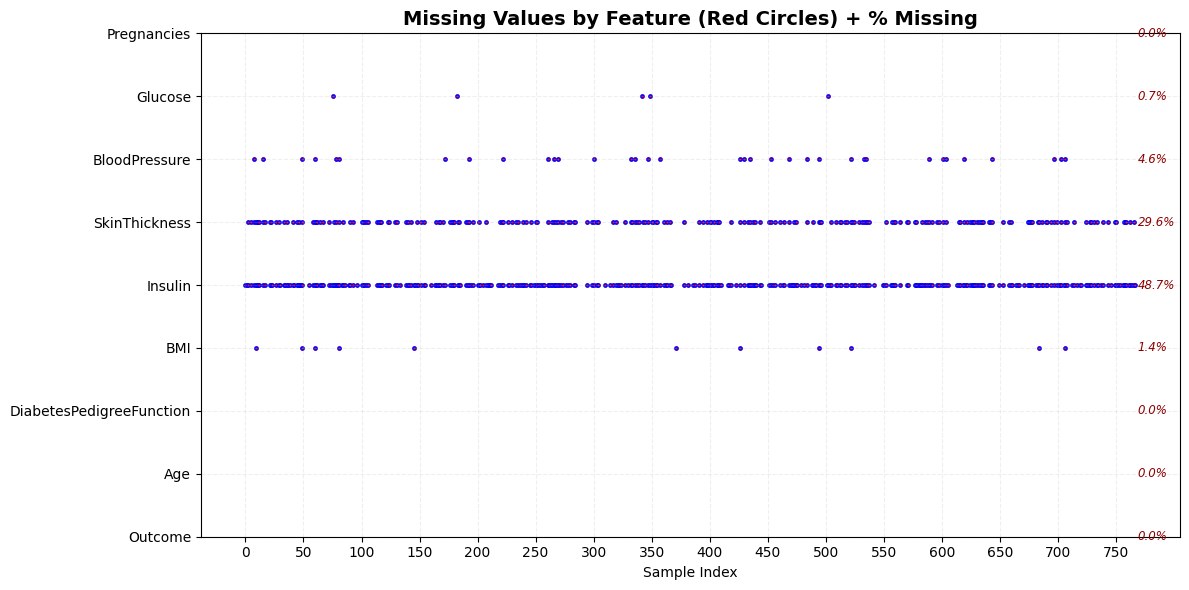

In [ ]:
from sklearn.impute import KNNImputer
df_missing = df.copy()
missing_before = df_missing.isna()
missing_mask = df_missing.isna()

missing_mask = df_missing.isna()
missing_percent = missing_mask.sum() / missing_mask.shape[0] * 100
plt.figure(figsize=(12, 6))
for col_idx, col in enumerate(missing_mask.columns):
    for row_idx in range(missing_mask.shape[0]):
        if missing_mask.iloc[row_idx, col_idx]:
            plt.scatter(row_idx, col_idx, color='r', s=6, edgecolors='b')

for col_idx, col in enumerate(missing_mask.columns):
    plt.text(missing_mask.shape[0] + 1, col_idx, f"{missing_percent[col]:.1f}%",
             va='center', ha='left', fontsize=8.5, color='darkred', fontstyle='italic')
plt.yticks(ticks=np.arange(len(missing_mask.columns)), labels=missing_mask.columns)
plt.xticks(ticks=np.arange(0, missing_mask.shape[0], 50), labels=np.arange(0, missing_mask.shape[0], 50))
plt.xlabel("Sample Index")
plt.title("Missing Values by Feature (Red Circles) + % Missing", fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.2)
plt.gca().invert_yaxis()
plt.tight_layout()
# plt.show()
plt.savefig('./RES/missing_before.svg', dpi=1300)
imputer = KNNImputer(n_neighbors=3)
df_imputed = df_missing.copy()
df_imputed[features_with_invalid_zeros] = imputer.fit_transform(df_missing[features_with_invalid_zeros])

imputer = KNNImputer(n_neighbors=3)
df[features_with_invalid_zeros] = imputer.fit_transform(df[features_with_invalid_zeros])
print('After imputation', df.isna().sum().sum())

# Normalization
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df.drop(columns=['Outcome'])),
                                 columns=df.columns[:-1])
df_zscore_scaled = pd.DataFrame(scaler_zscore.fit_transform(df.drop(columns=['Outcome'])),
                                 columns=df.columns[:-1])

# Outlier detection by --- > IsolationForest module
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df_zscore_scaled)
df['Outlier'] = (outliers == -1).astype(int)
df['Outlier'].value_counts()


# df['Age'].plot(kind='hist', bins=20, figsize=(11, 6), color='darkcyan')
# plt.savefig('./RES/age_hist_after_oulier_detection.svg', dpi=1300)


plt.figure(figsize=(14, 5))
plt.plot(df['BloodPressure'][:50], color='darkcyan', label='BloodPressure')
plt.plot(range(50), [df['BloodPressure'][:50].mean()] * 50, linestyle='--', c = 'b', label='Mean Blood Pressure')
plt.fill_between(range(50), df['BloodPressure'][:50] + df['BloodPressure'][:50]*0.2, df['BloodPressure'][:50] - df['BloodPressure'][:50]*0.2, color='lightblue', alpha=0.35)
for idx in df[df['Outlier'] == 1].index:
    plt.axvspan(idx - 0.5, idx + 0.5, color='red', alpha=0.15)

plt.title("Blood Pressure with Outlier Highlighting", fontsize=13, weight='bold')
plt.xlabel("Sample Index")
plt.ylabel("Blood Pressure")
plt.xlim(0, 50)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend()
# plt.show()
plt.savefig('./RES/blood_pressure_outlier.svg', dpi=1300)


plt.figure(figsize=(11, 5))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outlier', palette={0: 'blue', 1: 'red'}, s=60)
plt.title("Outlier Detection with Isolation Forest", fontsize=14, weight='bold')
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title='Outlier', labels=['Normal', 'Outlier'])
plt.grid(True)
plt.tight_layout()
plt.savefig('./RES/scatter_outlier.svg', dpi=1300)



In [ ]:

df_cleaned = df[outliers == 1].reset_index(drop=True)
# X = df_cleaned.drop(columns=['Outcome', 'Cluster'])
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome'].astype(int)

# Feature Extraction by Genethic Algorithm (GA)
*DEAP is utilized to implement this evolutionary algorithm*

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 1: Best Fitness = 0.7808219178082192
Generation 2: Best Fitness = 0.7899543378995434
Generation 3: Best Fitness = 0.7853881278538812
Generation 4: Best Fitness = 0.7899543378995434
Generation 5: Best Fitness = 0.7899543378995434
Generation 6: Best Fitness = 0.7899543378995434
Generation 7: Best Fitness = 0.7899543378995434
Generation 8: Best Fitness = 0.7899543378995434
Generation 9: Best Fitness = 0.7899543378995434
Generation 10: Best Fitness = 0.7899543378995434
Generation 11: Best Fitness = 0.7899543378995434
Generation 12: Best Fitness = 0.7899543378995434
Generation 13: Best Fitness = 0.7899543378995434
Generation 14: Best Fitness = 0.7899543378995434
Generation 15: Best Fitness = 0.7899543378995434
Generation 16: Best Fitness = 0.7899543378995434
Generation 17: Best Fitness = 0.7899543378995434
Generation 18: Best Fitness = 0.8036529680365296
Generation 19: Best Fitness = 0.7899543378995434
Generation 20: Best Fitness = 0.7899543378995434
Generation 21: Best Fitness =

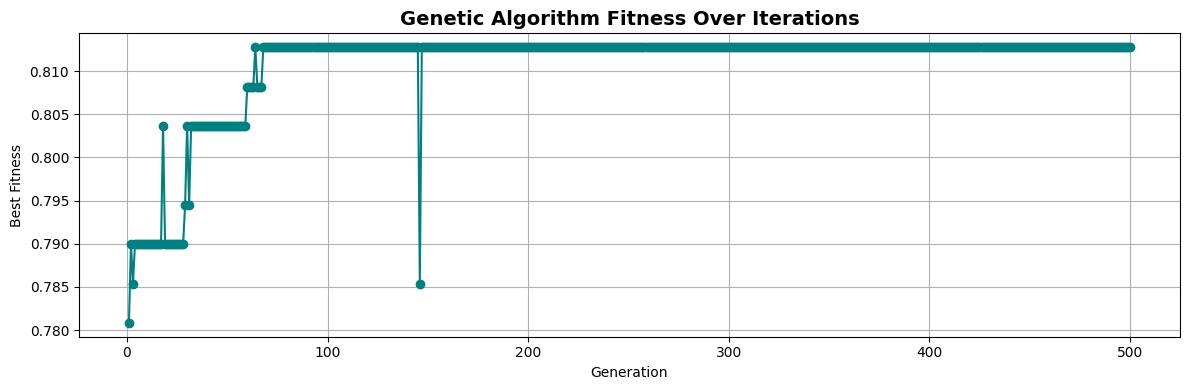

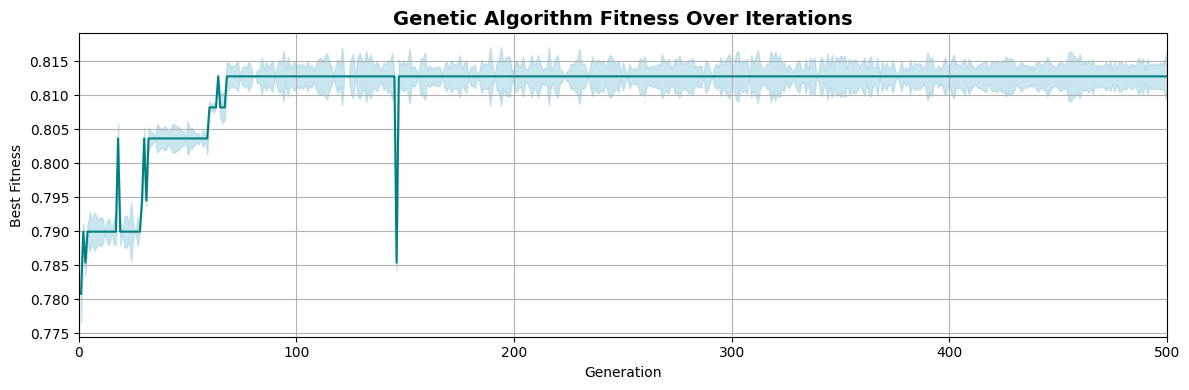

In [ ]:
def evaluate_features(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0.0,
    X_selected = X.iloc[:, selected_features]
    if X_selected.ndim == 1:
        X_selected = X_selected.to_frame()
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
    model = RandomForestClassifier(n_estimators=18, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
num_features = X.shape[1]
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=num_features)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_features)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
toolbox.register("select", tools.selTournament, tournsize=3)

random.seed(42)
population = toolbox.population(n=10)
NGEN = 500

fitness_progress = []
other_fitness_progress = []
for gen in range(NGEN):
    if gen < 100:
      pop_size = 10
    elif (gen >= 100) and (gen < 200):
      pop_size = 12
    elif (gen >= 200) and (gen < 300):
      pop_size = 15
    elif (gen >= 300) and (gen < 400):
      pop_size = 19
    else:
      pop_size = 50

    offspring = toolbox.select(population, k=pop_size)
    offspring = list(map(toolbox.clone, offspring))
    offspring = algorithms.varAnd(offspring, toolbox, cxpb=0.5, mutpb=0.2)
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fits = list(map(toolbox.evaluate, invalid_ind))

    for ind, fit in zip(invalid_ind, fits):
        ind.fitness.values = fit
    population[:] = offspring
    best_fit = max(fits)
    min_fit = min(fits)
    std_fit = np.std(fits)
    print(f"Generation {gen+1}: Best Fitness = {best_fit[0]}")
    fitness_progress.append(best_fit[0])
    other_fitness_progress.append(min_fit[0])
    other_fitness_progress.append(std_fit)

best_individual = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]
X_selected = X.iloc[:, selected_features]
print("Best Individual:", best_individual)
print("Selected Features:", X_selected.columns)

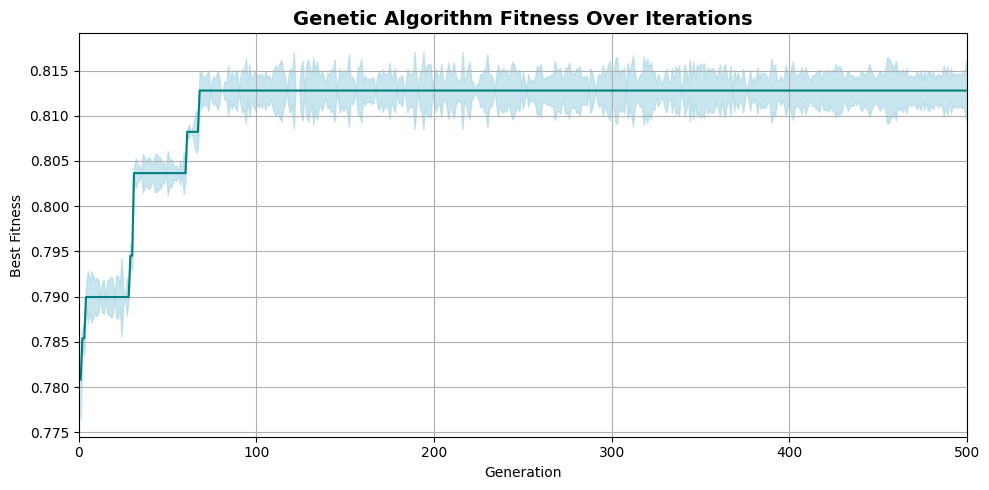

In [ ]:

# plt.figure(figsize=(12, 4))
# plt.plot(range(1, NGEN+1), fitness_progress, marker='o', color='teal')
# plt.title("Genetic Algorithm Fitness Over Iterations", fontsize=14, weight='bold')
# plt.xlabel("Generation")
# plt.ylabel("Best Fitness")
# plt.grid(True)
# plt.tight_layout()
# # plt.show()
# plt.savefig('ga_fitness.svg', dpi=1300)


plt.figure(figsize=(10, 5))
plt.plot(range(1, NGEN+1), fitness_progress, color='teal')
plt.fill_between(range(1, NGEN+1), np.array(fitness_progress)-np.array(other_fitness_progress[1::2])*0.084, np.array(fitness_progress)+np.array(other_fitness_progress[1::2])*0.084, color='lightblue', alpha=0.66)
plt.title("Genetic Algorithm Fitness Over Iterations", fontsize=14, weight='bold')
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.xlim(0, NGEN)
plt.grid(True)
plt.tight_layout()
# plt.show()
plt.savefig('./RES/ga_fitness_zoom.svg', dpi=1300)